In [2]:
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime

In [3]:


lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)
coordinates

[(-16.225626690892412, 117.23040160167153),
 (80.115588492173, 179.48782403137216),
 (-28.408129884347375, 98.35929674160576),
 (41.717129594574175, -178.4587199789837),
 (-80.15874448725441, 36.668034672716146),
 (-25.767511798801337, 93.42747788275585),
 (78.31213909141988, 97.25075433632867),
 (17.766803102206296, -149.00152319495942),
 (86.06799347785315, -13.469002417557249),
 (7.466050328935864, -31.05375220063638),
 (-11.991430373001492, 55.289447345711096),
 (44.04766904650768, 1.7501657622021582),
 (39.141776623371356, -73.51711109753035),
 (70.71087259415316, -44.42716570275047),
 (-73.0452054047965, 57.32709202096888),
 (-41.42873278666483, -27.766007249286048),
 (-76.35288164618363, -101.49545329882248),
 (22.422192755485142, -22.71305066874288),
 (-38.469884872082424, -61.29767475957543),
 (-22.59994169367407, 76.00439821773796),
 (27.159363385552936, -65.03900672024571),
 (-88.72773460525985, -20.355282732320745),
 (-60.22374163898701, -87.76554894759197),
 (11.6672416145

In [5]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)



604

In [34]:
cities

['port hedland',
 'leningradskiy',
 'carnarvon',
 'provideniya',
 'port elizabeth',
 'khatanga',
 'hilo',
 'illoqqortoormiut',
 'sao filipe',
 'sambava',
 'gaillac',
 'brigantine',
 'ilulissat',
 'taolanaro',
 'arraial do cabo',
 'punta arenas',
 'ponta do sol',
 'punta alta',
 'grand river south east',
 'hamilton',
 'ushuaia',
 'dinguiraye',
 'husavik',
 'new norfolk',
 'tessalit',
 'qaqortoq',
 'hermanus',
 'havre-saint-pierre',
 'aborlan',
 'belushya guba',
 'cidreira',
 'havelock',
 'mount isa',
 'kapaa',
 'rikitea',
 'mataura',
 'lompoc',
 'auki',
 'kismayo',
 'fairbanks',
 'mehamn',
 'ancud',
 'severnoye',
 'harper',
 'mys shmidta',
 'lodja',
 'severo-kurilsk',
 'hithadhoo',
 'cabo san lucas',
 'derzhavinsk',
 'aklavik',
 'half moon bay',
 'kahului',
 'pangnirtung',
 'dunkirk',
 'anchorage',
 'kavieng',
 'barrow',
 'thompson',
 'airai',
 'castro',
 'guerrero negro',
 'avarua',
 'chingirlau',
 'yellowknife',
 'bethel',
 'bluff',
 'mogadishu',
 'nikolskoye',
 'qaanaaq',
 'longyearb

In [6]:
city_data = []
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
record_count = 1
set_count = 1

print("Beginning Data Retrieval     ")
print("-----------------------------")

for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    city_url = url + "&q=" + city.replace(" ","+")
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print(f"{city} not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port hedland
Processing Record 2 of Set 1 | leningradskiy
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | provideniya
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | illoqqortoormiut
illoqqortoormiut not found. Skipping...
Processing Record 9 of Set 1 | sao filipe
Processing Record 10 of Set 1 | sambava
Processing Record 11 of Set 1 | gaillac
Processing Record 12 of Set 1 | brigantine
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | taolanaro
taolanaro not found. Skipping...
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | punta alta
Processing Record 19 of Set 1 | grand river south east
grand river south east not found. Skipp

Processing Record 38 of Set 4 | peterhead
Processing Record 39 of Set 4 | tazovskiy
Processing Record 40 of Set 4 | sitka
Processing Record 41 of Set 4 | jamestown
Processing Record 42 of Set 4 | saint george
Processing Record 43 of Set 4 | coquimbo
Processing Record 44 of Set 4 | namibe
Processing Record 45 of Set 4 | xinyu
Processing Record 46 of Set 4 | cape town
Processing Record 47 of Set 4 | asfi
Processing Record 48 of Set 4 | kirkuk
Processing Record 49 of Set 4 | sulangan
Processing Record 50 of Set 4 | amderma
amderma not found. Skipping...
Processing Record 1 of Set 5 | halifax
Processing Record 2 of Set 5 | locri
Processing Record 3 of Set 5 | lazaro cardenas
Processing Record 4 of Set 5 | lucea
Processing Record 5 of Set 5 | soligalich
Processing Record 6 of Set 5 | motygino
Processing Record 7 of Set 5 | marsh harbour
Processing Record 8 of Set 5 | sentyabrskiy
sentyabrskiy not found. Skipping...
Processing Record 9 of Set 5 | yulara
Processing Record 10 of Set 5 | grand 

Processing Record 31 of Set 8 | toamasina
Processing Record 32 of Set 8 | dedza
Processing Record 33 of Set 8 | yumen
Processing Record 34 of Set 8 | oga
Processing Record 35 of Set 8 | nagato
Processing Record 36 of Set 8 | olivenza
Processing Record 37 of Set 8 | ajdabiya
Processing Record 38 of Set 8 | krasnovishersk
Processing Record 39 of Set 8 | paratinga
Processing Record 40 of Set 8 | saquena
Processing Record 41 of Set 8 | cherskiy
Processing Record 42 of Set 8 | tsihombe
tsihombe not found. Skipping...
Processing Record 43 of Set 8 | mergui
mergui not found. Skipping...
Processing Record 44 of Set 8 | norman wells
Processing Record 45 of Set 8 | rawlins
Processing Record 46 of Set 8 | kadykchan
kadykchan not found. Skipping...
Processing Record 47 of Set 8 | placer
Processing Record 48 of Set 8 | terebovlya
Processing Record 49 of Set 8 | russell
Processing Record 50 of Set 8 | mananjary
Processing Record 1 of Set 9 | aksu
Processing Record 2 of Set 9 | mount darwin
Processin

Processing Record 20 of Set 12 | magalia
Processing Record 21 of Set 12 | avera
Processing Record 22 of Set 12 | manokwari
Processing Record 23 of Set 12 | iquitos
Processing Record 24 of Set 12 | izumo
Processing Record 25 of Set 12 | merke
Processing Record 26 of Set 12 | matay
Processing Record 27 of Set 12 | atar
Processing Record 28 of Set 12 | rio branco
Processing Record 29 of Set 12 | ornskoldsvik
Processing Record 30 of Set 12 | collie
Processing Record 31 of Set 12 | zhizdra
Processing Record 32 of Set 12 | ust-kulom
Processing Record 33 of Set 12 | tawkar
tawkar not found. Skipping...
Processing Record 34 of Set 12 | vadso
Processing Record 35 of Set 12 | biltine
Processing Record 36 of Set 12 | zhigalovo
Processing Record 37 of Set 12 | lyuban
Processing Record 38 of Set 12 | vytegra
Processing Record 39 of Set 12 | huanren
Processing Record 40 of Set 12 | bull savanna
Processing Record 41 of Set 12 | quang ngai
Processing Record 42 of Set 12 | southbridge
Processing Record

In [7]:
len(city_data)

560

In [8]:
city_data_df = pd.DataFrame(city_data)

In [9]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Hedland,-20.32,118.57,82.40,61,49,5.82,AU,2020-11-24 17:03:06
1,Leningradskiy,69.38,178.42,21.85,97,100,2.98,RU,2020-11-24 17:03:06
2,Carnarvon,-24.87,113.63,73.40,69,0,14.99,AU,2020-11-24 17:03:06
3,Provideniya,64.38,-173.30,32.02,98,100,16.31,RU,2020-11-24 17:03:06
4,Port Elizabeth,-33.92,25.57,64.40,72,75,26.40,ZA,2020-11-24 17:03:06


In [10]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]

In [11]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Hedland,AU,2020-11-24 17:03:06,-20.32,118.57,82.40,61,49,5.82
1,Leningradskiy,RU,2020-11-24 17:03:06,69.38,178.42,21.85,97,100,2.98
2,Carnarvon,AU,2020-11-24 17:03:06,-24.87,113.63,73.40,69,0,14.99
3,Provideniya,RU,2020-11-24 17:03:06,64.38,-173.30,32.02,98,100,16.31
4,Port Elizabeth,ZA,2020-11-24 17:03:06,-33.92,25.57,64.40,72,75,26.40
...,...,...,...,...,...,...,...,...,...
555,Dawlatabad,AF,2020-11-24 17:03:44,36.41,64.91,35.10,77,61,4.21
556,Barra Do Garcas,BR,2020-11-24 16:59:59,-15.89,-52.26,91.08,45,6,8.16
557,Samarai,PG,2020-11-24 17:03:44,-10.62,150.67,80.42,78,76,10.94
558,Kadaya,RU,2020-11-24 17:03:44,50.93,119.29,2.62,91,0,3.40


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
import time

today = time.time()

In [15]:
today

1606237424.664191

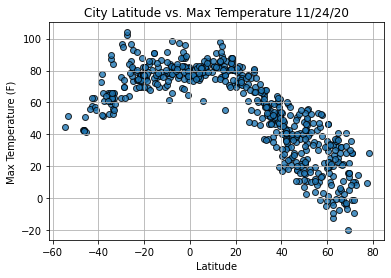

In [16]:
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

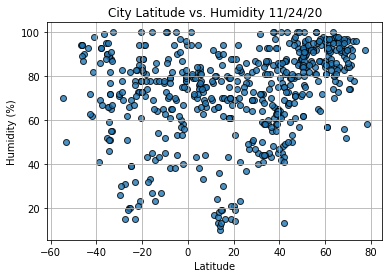

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

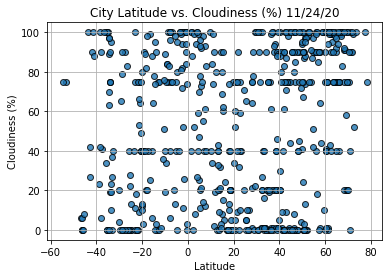

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

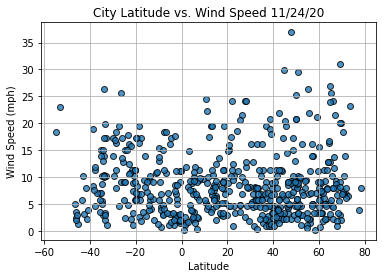

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
from scipy.stats import linregress

def linearreg(x_values, y_values):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, (0,1), fontsize=15, color="red")
    plt.xlabel(f'Latitude')
    plt.ylabel('Temp')
    plt.show()

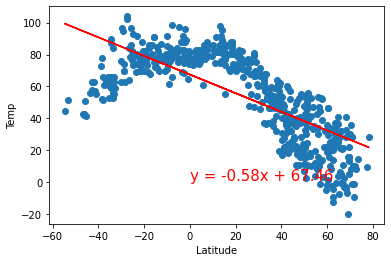

In [21]:
linearreg(lats, max_temps)

In [22]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.figure(figsize=(10,5))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [23]:
index13 = city_data_df.loc[13] 
index13

City                 Punta Arenas
Country                        CL
Date          2020-11-24 17:03:07
Lat                        -53.15
Lng                        -70.92
Max Temp                     51.8
Humidity                       50
Cloudiness                     75
Wind Speed                  23.04
Name: 13, dtype: object

In [24]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

northern_hemi_df.columns

Index(['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity',
       'Cloudiness', 'Wind Speed'],
      dtype='object')

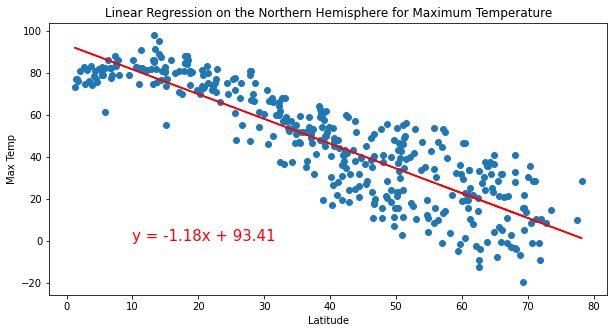

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                       'Max Temp',(10,0))


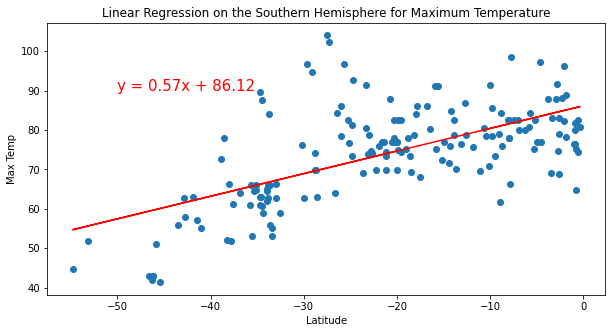

In [26]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                       'Max Temp',(-50,90))

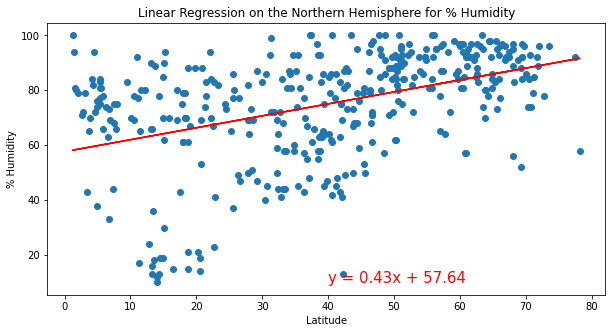

In [27]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

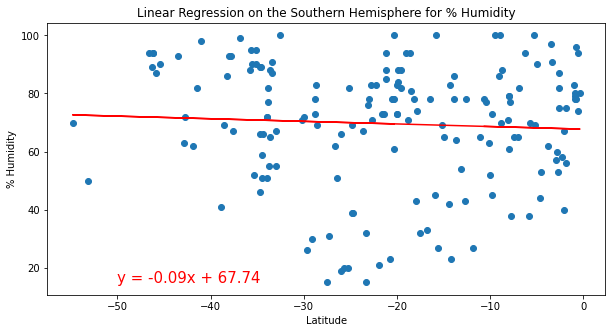

In [28]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

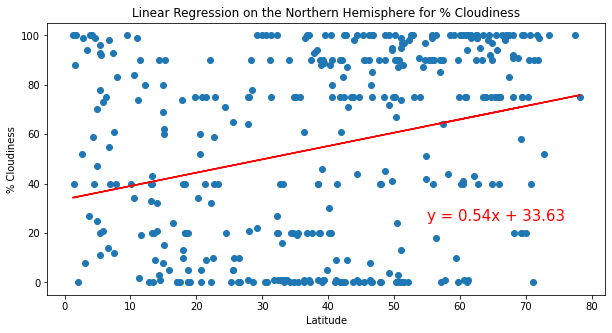

In [29]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(55,25))

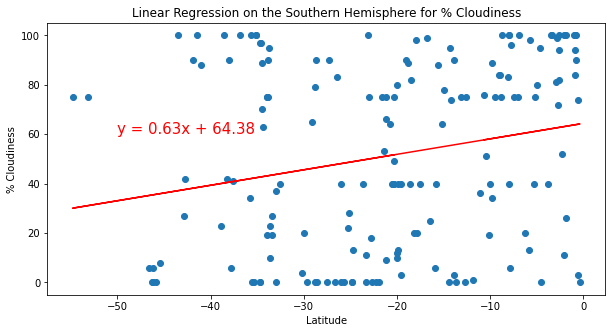

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

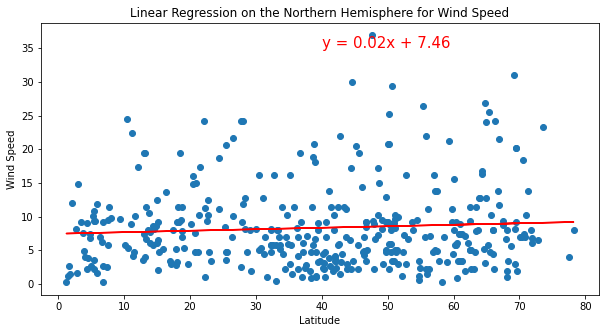

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

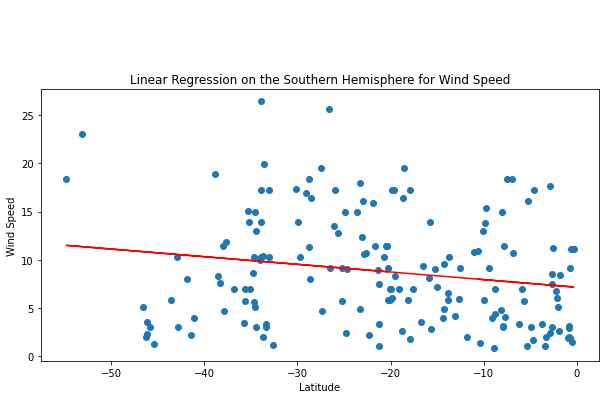

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))